In [4]:
import torch
from PIL import Image




ModuleNotFoundError: No module named 'torch'

In [ ]:
!cd yolov5 & pip install -r requirements.txt

  Obtaining dependency information for pillow>=10.3.0 from https://files.pythonhosted.org/packages/0a/16/c83877524c47976f16703d2e05c363244bc1e60ab439e078b3cd046d07db/pillow-10.3.0-cp311-cp311-win_amd64.whl.metadata
  Using cached pillow-10.3.0-cp311-cp311-win_amd64.whl.metadata (9.4 kB)
  Obtaining dependency information for requests>=2.32.0 from https://files.pythonhosted.org/packages/f9/9b/335f9764261e915ed497fcdeb11df5dfd6f7bf257d4a6a2a686d80da4d54/requests-2.32.3-py3-none-any.whl.metadata
  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
  Obtaining dependency information for thop>=0.1.1 from https://files.pythonhosted.org/packages/bb/0f/72beeab4ff5221dc47127c80f8834b4bcd0cb36f6ba91c0b1d04a1233403/thop-0.1.1.post2209072238-py3-none-any.whl.metadata
  Using cached thop-0.1.1.post2209072238-py3-none-any.whl.metadata (2.7 kB)
  Obtaining dependency information for torch>=1.8.0 from https://files.pythonhosted.org/packages/d3/1d/a257913c89572de61316461db91867f87519146e58

ERROR: Cannot uninstall 'TBB'. It is a distutils installed project and thus we cannot accurately determine which files belong to it which would lead to only a partial uninstall.


In [13]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [ ]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in C:\Users\elkha/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2024-6-27 Python-3.12.4 torch-2.3.1+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [ ]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

In [ ]:
img_path = r'C:\Users\elkha\Downloads\images.jpeg'

In [ ]:
img=Image.open(img_path)
results=model(img)
results.print()

image 1/1: 259x194 1 person, 1 tie
Speed: 22.0ms pre-process, 680.0ms inference, 5.0ms NMS per image at shape (1, 3, 640, 480)


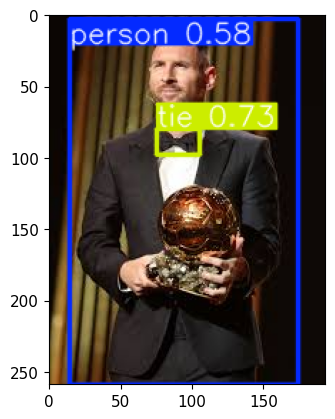

In [ ]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [ ]:
results.render()

[array([[[ 11,   6,   3],
         [ 11,   6,   3],
         [ 11,   6,   3],
         ...,
         [ 12,   8,   7],
         [ 14,  10,  11],
         [ 12,  10,  13]],
 
        [[ 11,   6,   3],
         [ 11,   6,   3],
         [ 11,   6,   3],
         ...,
         [ 12,   8,   7],
         [ 14,  10,  11],
         [ 12,  10,  13]],
 
        [[ 11,   6,   3],
         [ 11,   6,   3],
         [ 11,   6,   3],
         ...,
         [ 12,   8,   7],
         [ 14,  10,  11],
         [ 12,  10,  13]],
 
        ...,
 
        [[119,  81,  19],
         [137,  96,  34],
         [158, 110,  46],
         ...,
         [ 14,   9,   6],
         [ 13,   8,   5],
         [ 13,   8,   5]],
 
        [[120,  80,  19],
         [137,  96,  34],
         [158, 108,  45],
         ...,
         [ 14,   9,   6],
         [ 13,   8,   5],
         [ 13,   8,   5]],
 
        [[119,  79,  18],
         [137,  96,  34],
         [158, 108,  45],
         ...,
         [ 14,   9,   6],
  

In [ ]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

In [ ]:
import uuid   # Unique identifier
import os
import time

In [ ]:
IMAGES_PATH = os.path.join('data', 'images') #/data/images
labels = ['awake', 'drowsy']
number_imgs = 10

In [ ]:
cap = cv2.VideoCapture(0)
# Loop through labels
for label in labels:
    print('Collecting images for {}'.format(label))
    time.sleep(5)
    
    # Loop through image range
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        
        # Webcam feed
        ret, frame = cap.read()
        
        # Naming out image path
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        
        # Writes out image to file 
        cv2.imwrite(imgname, frame)
        
        # Render to the screen
        cv2.imshow('Image Collection', frame)
        
        # 2 second delay between captures
        time.sleep(2)
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

In [ ]:
print(os.path.join(IMAGES_PATH, labels[0]+'.'+str(uuid.uuid1())+'.jpg'))

data\images\awake.80d43072-356e-11ef-9540-54ee751c9fa4.jpg


In [ ]:
for label in labels:
    print('Collecting images for {}'.format(label))
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        print(imgname) 

data\images\awake.813508a9-356e-11ef-b163-54ee751c9fa4.jpg
data\images\awake.813508aa-356e-11ef-9c3d-54ee751c9fa4.jpg
data\images\awake.813508ab-356e-11ef-aa75-54ee751c9fa4.jpg
data\images\awake.813508ac-356e-11ef-84de-54ee751c9fa4.jpg
data\images\awake.813508ad-356e-11ef-9cc4-54ee751c9fa4.jpg
data\images\awake.813508ae-356e-11ef-809b-54ee751c9fa4.jpg
data\images\awake.813508af-356e-11ef-84e9-54ee751c9fa4.jpg
data\images\awake.813508b0-356e-11ef-9caf-54ee751c9fa4.jpg
data\images\awake.813508b1-356e-11ef-b952-54ee751c9fa4.jpg
data\images\awake.813508b2-356e-11ef-8433-54ee751c9fa4.jpg
data\images\drowsy.813508b3-356e-11ef-ab2b-54ee751c9fa4.jpg
data\images\drowsy.813508b4-356e-11ef-9521-54ee751c9fa4.jpg
data\images\drowsy.813508b5-356e-11ef-b341-54ee751c9fa4.jpg
data\images\drowsy.813508b6-356e-11ef-8183-54ee751c9fa4.jpg
data\images\drowsy.813508b7-356e-11ef-9860-54ee751c9fa4.jpg
data\images\drowsy.813508b8-356e-11ef-97b1-54ee751c9fa4.jpg
data\images\drowsy.81352fe3-356e-11ef-a531-54ee751

In [ ]:
!pip install pyqt5 lxml --upgrade
!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

  Obtaining dependency information for pyqt5 from https://files.pythonhosted.org/packages/ca/ac/596e8ca16fd0634542d874c0d79219fc527ea7de73a5000092f60ecbf6e9/PyQt5-5.15.10-cp37-abi3-win_amd64.whl.metadata
  Using cached PyQt5-5.15.10-cp37-abi3-win_amd64.whl.metadata (2.2 kB)
  Obtaining dependency information for lxml from https://files.pythonhosted.org/packages/04/19/d6aa2d980f220a04c91d4de538d2fea1a65535e7b0a4aec0998ce46e3667/lxml-5.2.2-cp311-cp311-win_amd64.whl.metadata
  Using cached lxml-5.2.2-cp311-cp311-win_amd64.whl.metadata (3.5 kB)
Using cached PyQt5-5.15.10-cp37-abi3-win_amd64.whl (6.8 MB)
Using cached lxml-5.2.2-cp311-cp311-win_amd64.whl (3.8 MB)
  Attempting uninstall: pyqt5
    Found existing installation: PyQt5 5.15.7
    Uninstalling PyQt5-5.15.7:
      Successfully uninstalled PyQt5-5.15.7


ERROR: Could not install packages due to an OSError: [WinError 5] Accès refusé: 'C:\\Users\\elkha\\AppData\\Local\\Temp\\pip-uninstall-evjqf510\\qtcore.pyd'
Consider using the `--user` option or check the permissions.



In [14]:
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 500 --data dataset.yaml --weights yolov5s.pt --workers 2



train: weights=yolov5s.pt, cfg=, data=dataset.yaml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=500, batch_size=16, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data\hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=2, project=runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest, ndjson_console=False, ndjson_file=False
github: up to date with https://github.com/ultralytics/yolov5 
YOLOv5  v7.0-331-gab364c98 Python-3.12.4 torch-2.3.1+cpu CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2,

In [15]:
import torch
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp5/weights/last.pt', force_reload=True)


Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\elkha/.cache\torch\hub\master.zip
YOLOv5  2024-6-29 Python-3.12.4 torch-2.3.1+cpu CPU

Fusing layers... 
Model summary: 157 layers, 7055974 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


In [3]:
import torch
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp3/weights/last.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\elkha/.cache\torch\hub\master.zip
YOLOv5  2024-6-29 Python-3.12.4 torch-2.3.1+cpu CPU

Fusing layers... 
Model summary: 157 layers, 7055974 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


In [16]:
import os
imgpath = r'C:\Users\elkha\data\images\awake.5e81872d-3559-11ef-ad4b-54ee751c9fa4.jpg'

In [17]:
from PIL import Image
img=Image.open(imgpath)
results=model(img)
results.print()

image 1/1: 480x640 1 awake
Speed: 67.0ms pre-process, 418.0ms inference, 23.0ms NMS per image at shape (1, 3, 480, 640)


In [18]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

NameError: name 'plt' is not defined

In [5]:
import os
from PIL import Image
import torch

# Define the path to your image
imgpath = r'C:\Users\elkha\data\images\drowsy.6ee7a8bc-3559-11ef-9833-54ee751c9fa4.jpg'

# Load the custom YOLOv5 model
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp5/weights/last.pt', force_reload=True)

# Open the image using PIL
img = Image.open(imgpath)

# Run inference on the image
results = model(img)

# Print the results
results.print()

# Show the results (optional, depends on your environment)
results.show()


Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\elkha/.cache\torch\hub\master.zip
YOLOv5  2024-7-31 Python-3.12.4 torch-2.3.1+cpu CPU



Exception: [Errno 2] No such file or directory: 'yolov5\\runs\\train\\exp5\\weights\\last.pt'. Cache may be out of date, try `force_reload=True` or see https://docs.ultralytics.com/yolov5/tutorials/pytorch_hub_model_loading for help.

In [1]:
import cv2
import numpy as np
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

NameError: name 'model' is not defined